<a href="https://colab.research.google.com/github/naokityokoyama/Deep_Learing/blob/main/Deep_leaning_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [139]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [84]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [114]:
df.shape

(10000, 14)

In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [34]:
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [85]:
X = df.iloc[:,3:13]
y = df.iloc[:,13]

In [86]:
le = LabelEncoder()

X.iloc[:,1] = le.fit_transform(X.iloc[:,1])
X.iloc[:,2] = le.fit_transform(X.iloc[:,2])

In [91]:
pais = pd.get_dummies(X['Geography'])

In [95]:
X = pd.concat([pais, X], axis=1)

In [97]:
X = X.drop('Geography', axis=1)

In [103]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [104]:
sc = StandardScaler()

In [106]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [124]:
#rede neural (12+1/2 = 6)

classificador = Sequential()
classificador.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim=12))
classificador.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
classificador.add(Dense(units=1, kernel_initializer= 'uniform' , activation='sigmoid'))

classificador.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [125]:
classificador.fit(X_train, y_train, epochs=100, batch_size=10)

Epoch 1/100
800/800 [==============================] - 1s 928us/step - loss: 0.5646 - accuracy: 0.7981
Epoch 2/100
800/800 [==============================] - 1s 955us/step - loss: 0.4416 - accuracy: 0.7883
Epoch 3/100
800/800 [==============================] - 1s 937us/step - loss: 0.4262 - accuracy: 0.7952
Epoch 4/100
800/800 [==============================] - 1s 984us/step - loss: 0.4199 - accuracy: 0.8006
Epoch 5/100
800/800 [==============================] - 1s 972us/step - loss: 0.4169 - accuracy: 0.8194
Epoch 6/100
800/800 [==============================] - 1s 990us/step - loss: 0.4168 - accuracy: 0.8246
Epoch 7/100
800/800 [==============================] - 1s 912us/step - loss: 0.4184 - accuracy: 0.8255
Epoch 8/100
800/800 [==============================] - 1s 964us/step - loss: 0.4112 - accuracy: 0.8323
Epoch 9/100
800/800 [==============================] - 1s 986us/step - loss: 0.4190 - accuracy: 0.8340
Epoch 10/100
800/800 [==============================] - 1s 1ms/step - los

In [126]:
classificador.evaluate(X_test, y_test)

63/63 [==============================] - 0s 943us/step - loss: 0.3964 - accuracy: 0.8395


[0.39640891551971436, 0.8395000100135803]

In [137]:
y_pred = classificador.predict(X_test)
pd.DataFrame(y_pred, columns=['%'])

,%
0,0.170636
1,0.286866
2,0.149720
3,0.038204
4,0.148708
...,...
1995,0.048430
1996,0.096550
1997,0.191467
1998,0.104334


In [155]:
cm = confusion_matrix(y_test, y_pred.round())
cm

array([[1560,   35],
       [ 286,  119]])

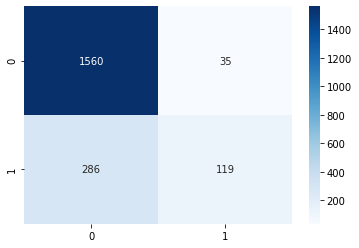

In [164]:
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')